In [1]:
import os
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.style as style
try:
    from db import db
except ModuleNotFoundError:
    #print(os.path.abspath(os.curdir))
    os.chdir('..') # set werkdirectory 1 niveau terug naar root folder
    from db import db
# matplotlib / seaborn
plt.rcParams['font.family'] = "Computer Modern"
sns.set(style="whitegrid") # , font='sans-serif', font_scale=1.25, context="talk"

In [2]:
sql_s = """
select top 20
v.topic
,count(distinct t.organization) as aantal_organisaties
from
doc_ner_software as v
inner join crawled_details as d on v.doc_id = d.doc_id
inner join doc_topic as t on v.doc_id = t.doc_id
group by
v.topic
having count(distinct t.organization) >= 3
order by 2 desc;
"""
df_s = db.read_sql(sql_s)

In [3]:
sql_v = """
select top 20
v.topic
,count(distinct t.organization) as aantal_organisaties
from
doc_ner_vakterm as v
inner join crawled_details as d on v.doc_id = d.doc_id
inner join doc_topic as t on v.doc_id = t.doc_id
group by
v.topic
having count(distinct t.organization) >= 3
order by 2 desc;
"""
df_v = db.read_sql(sql_v)

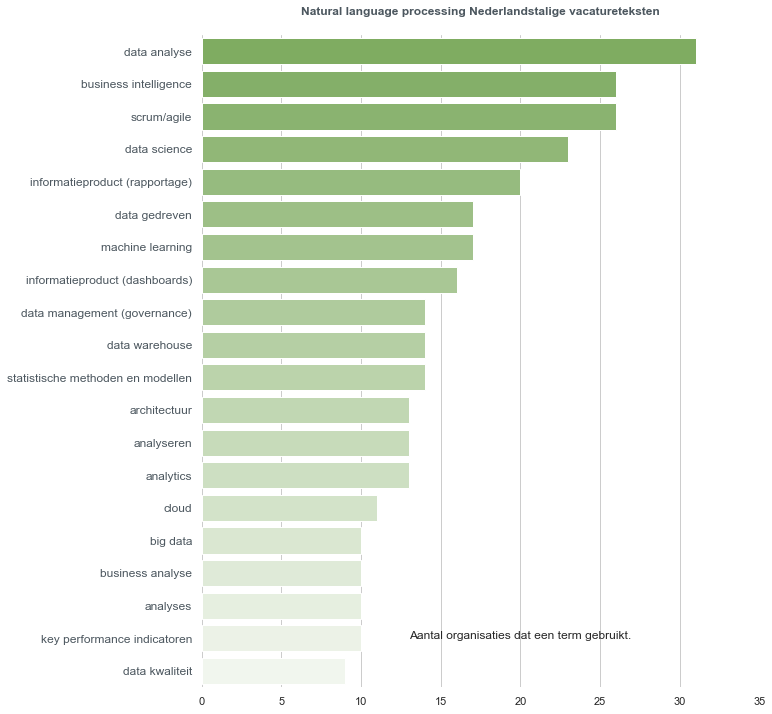

In [4]:
# https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.xlabel.html
plt.figure(figsize=(10,12))  
plt.title("Natural language processing Nederlandstalige vacatureteksten", 
          color ='#4c575f', 
          size=12, 
          weight=600,
          loc='center',
          pad=20)
sns.barplot(x='aantal_organisaties', 
            y='topic', 
            data=df_v,
            label='',  
            palette=sns.light_palette('#7cb855', reverse=True, n_colors=len(df_v)))
sns.despine(left=True, bottom=True)
plt.xlabel('')
plt.ylabel('')
plt.xlim(0, 35)
plt.tick_params(axis='y',labelcolor='#4c575f', labelsize=12)
plt.text(13.0, 18.0, 'Aantal organisaties dat een term gebruikt.')
plt.show()

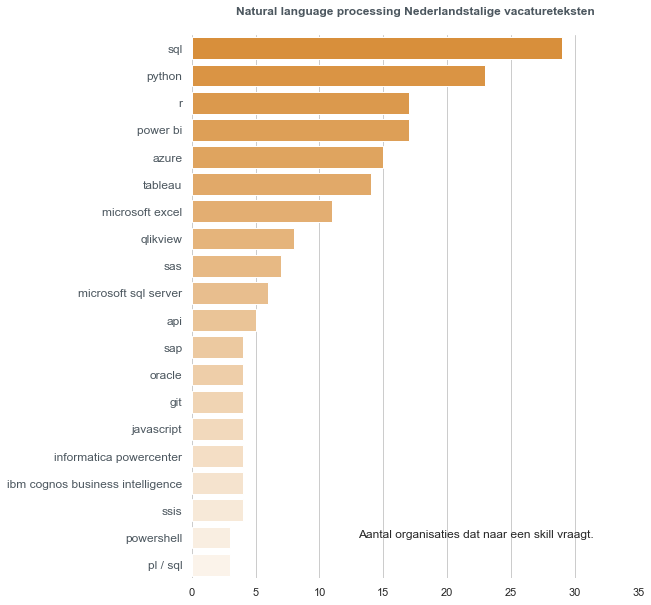

In [5]:
plt.figure(figsize=(8,10))  
plt.title("Natural language processing Nederlandstalige vacatureteksten", 
          color ='#4c575f', 
          size=12, 
          weight=600,
          loc='center',
          pad=20)
sns.barplot(x='aantal_organisaties', 
            y='topic', 
            data=df_s,
            label='',  
            palette=sns.light_palette('#f29121', reverse=True, n_colors=len(df_s)))
sns.despine(left=True, bottom=True)
plt.xlabel('')
plt.ylabel('')
plt.xlim(0, 35)
plt.tick_params(axis='y',labelcolor='#4c575f', labelsize=12)
plt.text(13.0, 18.0, 'Aantal organisaties dat naar een skill vraagt.')
plt.show()